In [2]:
pip install numpy matplotlib scikit-learn


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 8.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 6.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


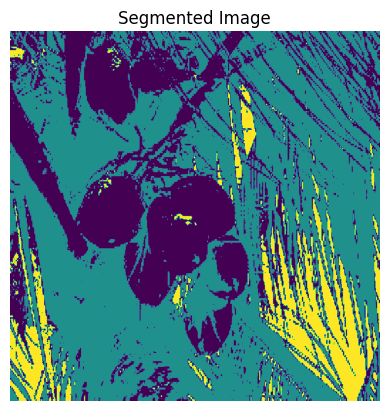

In [11]:
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from PIL import Image

def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img = img.convert('RGB')  # Convert to RGB if necessary
        img = np.array(img)
        images.append(img)
    return images

# Replace 'train', 'test', and 'valid' with your actual folder names
train_folder = '/home/ashwathama/Documents/GitHub/agritech/On-tree mature coconut fruit detection.v1i.multiclass/train'
test_folder = '/home/ashwathama/Documents/GitHub/agritech/On-tree mature coconut fruit detection.v1i.multiclass/test'
valid_folder = '/home/ashwathama/Documents/GitHub/agritech/On-tree mature coconut fruit detection.v1i.multiclass/valid'

# Load images from each folder
train_images = load_images_from_folder(train_folder)
test_images = load_images_from_folder(test_folder)
valid_images = load_images_from_folder(valid_folder)

# Concatenate images into a single array
train_images_reshaped = [img.reshape((-1, 3)) for img in train_images]
all_images = np.concatenate(train_images_reshaped)

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=0).fit(all_images)

# Segment a specific image (e.g., the first test image)
test_image = test_images[0]

# Get the height and width of the test image
height, width, _ = test_image.shape

# Predict cluster labels for each pixel
predicted_labels = kmeans.predict(test_image.reshape((-1, 3)))

# Reshape the predicted labels back to the original spatial dimensions (height, width)
segmented_image = predicted_labels.reshape((height, width))

# Display the segmented image
plt.imshow(segmented_image, cmap='viridis')
plt.title('Segmented Image')
plt.axis('off')
plt.show()


In [1]:
!pip install librosa


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
pip install librosa

  Using cached librosa-0.10.2.post1-py3-none-any.whl.metadata (8.6 kB)
  Using cached audioread-3.0.1-py3-none-any.whl.metadata (8.4 kB)
  Using cached numpy-2.2.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached scipy-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached numba-0.60.0-cp310-cp310-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (2.7 kB)
  Using cached soundfile-0.12.1-py2.py3-none-manylinux_2_31_x86_64.whl.metadata (14 kB)
  Using cached pooch-1.8.2-py3-none-any.whl.metadata (10 kB)
  Using cached soxr-0.5.0.post1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.6 kB)
  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
  Using cached msgpack-1.1.0-cp310-cp310-manylinux_2_1

In [2]:
pip install pyaudioanalysis


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 MB 2.5 MB/s eta 0:00:00a 0:00:01m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyaudioanalysis: filename=pyAudioAnalysis-0.3.14-py3-none-any.whl size=41411605 sha256=7b8567896400c292bb1e24d3e5c6f5b8785effbcfad430d5cdc9f57382423ccb
  Stored in directory: /home/ashwathama/.cache/pip/wheels/a7/54/73/fa830689c2440d2c81ff175c60e374930ad1607a8881e0f43f
Successfully built pyaudioanalysis
Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install eyed3 pydub matplotlib tqdm openpyxl

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import numpy as np
import pandas as pd
import librosa
from pyAudioAnalysis import audioBasicIO, ShortTermFeatures

# Define the root folder containing subfolders of audio files
folder = r"/home/ashwathama/Documents/GitHub/agritech/audio test"

# Prepare a list to hold data for all audio files
dataALL = []

# Duration to process (in seconds)
durationToProcess = 120  # Change this to the desired duration (in seconds)

# Iterate over each subfolder and file in the root folder
for subfolder, dirs, files in os.walk(folder):
    genre = os.path.basename(subfolder)  # Use the subfolder name as the genre
    for file in files:
        if file.endswith(".mp3"):  # Only process .mp3 files
            audioFilepath = os.path.join(subfolder, file)
            print(f"Processing file: {audioFilepath}")

            # Load the audio file using librosa
            try:
                x, Fs = librosa.load(audioFilepath, sr=None, mono=True, duration=durationToProcess)
            except Exception as e:
                print(f"Error reading {audioFilepath}: {e}")
                continue

            if x.size == 0:
                print(f"Warning: Skipping empty audio file {audioFilepath}")
                continue

            # Extract short-term features using pyAudioAnalysis
            F, f_name = ShortTermFeatures.feature_extraction(x, Fs, 0.050 * Fs, 0.025 * Fs)

            # Calculate the means of the features
            feature_means = {name: F[i, :].mean() for i, name in enumerate(f_name)}

            # Additional features using librosa
            try:
                # Onset detection
                onset_env = librosa.onset.onset_strength(y=x, sr=Fs)
                onsets = len(librosa.onset.onset_detect(y=x, sr=Fs))
                feature_means['Onsets'] = onsets

                # Harmonic and percussive components
                harmonic, percussive = librosa.effects.hpss(x)
                feature_means['Harmonic Mean'] = np.mean(harmonic)
                feature_means['Percussive Mean'] = np.mean(percussive)

                # CQT (Constant-Q Transform)
                cqt = librosa.cqt(x, sr=Fs)
                feature_means['CQT Mean'] = np.mean(np.abs(cqt))

                # Beat Synchronization
                mfcc = librosa.feature.mfcc(y=x, sr=Fs)
                tempo, beat_frames = librosa.beat.beat_track(y=x, sr=Fs)
                beat_mfcc = librosa.util.sync(mfcc, beat_frames, aggregate=np.mean)
                feature_means['Beat Sync MFCC Mean'] = np.mean(beat_mfcc)

                # Rhythm Complexity
                fourier_tempogram = librosa.feature.fourier_tempogram(y=x, sr=Fs)
                rhythm_complexity = np.mean(fourier_tempogram)
                feature_means['Rhythm Complexity'] = rhythm_complexity

                # Additional Harmonic/Pitch Features
                # Spectral Centroid
                spectral_centroid = librosa.feature.spectral_centroid(y=x, sr=Fs)
                feature_means['Spectral Centroid Mean'] = np.mean(spectral_centroid)

                # Spectral Rolloff (using correct 'roll_percent' parameter)
                spectral_rolloff = librosa.feature.spectral_rolloff(y=x, sr=Fs, roll_percent=0.85)
                feature_means['Spectral Rolloff Mean'] = np.mean(spectral_rolloff)

                # Chroma Features
                chroma = librosa.feature.chroma_stft(y=x, sr=Fs)
                feature_means['Chroma Mean'] = np.mean(chroma)

                # MFCC Delta (1st derivative)
                mfcc_delta = librosa.feature.delta(mfcc)
                feature_means['MFCC Delta Mean'] = np.mean(mfcc_delta)

                # MFCC Delta-Delta (2nd derivative)
                mfcc_delta2 = librosa.feature.delta(mfcc, order=2)
                feature_means['MFCC Delta-Delta Mean'] = np.mean(mfcc_delta2)

            except Exception as e:
                print(f"Error extracting additional features for {audioFilepath}: {e}")
                feature_means['Onsets'] = 0
                feature_means['Harmonic Mean'] = 0
                feature_means['Percussive Mean'] = 0
                feature_means['CQT Mean'] = 0
                feature_means['Beat Sync MFCC Mean'] = 0
                feature_means['Rhythm Complexity'] = 0
                feature_means['Spectral Centroid Mean'] = 0
                feature_means['Spectral Rolloff Mean'] = 0
                feature_means['Chroma Mean'] = 0
                feature_means['MFCC Delta Mean'] = 0
                feature_means['MFCC Delta-Delta Mean'] = 0

            # Extract tempogram and compute tempo
            try:
                tempo = librosa.feature.rhythm.tempo(onset_envelope=onset_env, sr=Fs)[0]  # Updated method
                feature_means['Tempo'] = tempo

                # Extract Tempogram
                tempogram = librosa.feature.tempogram(y=x, sr=Fs)
                feature_means['Tempogram Mean'] = np.mean(tempogram)

            except Exception as e:
                print(f"Error extracting tempo/tempogram for {audioFilepath}: {e}")
                feature_means['Tempo'] = 0
                feature_means['Tempogram Mean'] = 0

            # Add genre and file name to the feature dictionary
            feature_means['Genre'] = genre
            feature_means['File Name'] = file

            # Append the data to the list
            dataALL.append(feature_means)

# Create a DataFrame from the list of feature data
df = pd.DataFrame(dataALL)

# Set display options to avoid scientific notation
pd.set_option('display.float_format', '{:.15f}'.format)

# Save the DataFrame to an Excel file
output_filepath = r"/home/ashwathama/Documents/GitHub/agritech/audioTest.xlsx"
df.to_excel(output_filepath, index=False)

print(f"Features for all audio files saved to {output_filepath}")


Processing file: /home/ashwathama/Documents/GitHub/agritech/audio test/Mature Audio/Mature 00-05.mp3
Processing file: /home/ashwathama/Documents/GitHub/agritech/audio test/Mature Audio/Mature 05-10.mp3
Processing file: /home/ashwathama/Documents/GitHub/agritech/audio test/Mature Audio/Mature 10-15.mp3
Processing file: /home/ashwathama/Documents/GitHub/agritech/audio test/Mature Audio/Mature 15-20.mp3
Processing file: /home/ashwathama/Documents/GitHub/agritech/audio test/Mature Audio/Mature 25-30.mp3
Processing file: /home/ashwathama/Documents/GitHub/agritech/audio test/Mature Audio/Mature 30-35.mp3
Processing file: /home/ashwathama/Documents/GitHub/agritech/audio test/Mature Audio/Mature 35-40.mp3
Processing file: /home/ashwathama/Documents/GitHub/agritech/audio test/Mature Audio/Mature 40-45.mp3
Processing file: /home/ashwathama/Documents/GitHub/agritech/audio test/Mature Audio/Mature 45-50.mp3
Processing file: /home/ashwathama/Documents/GitHub/agritech/audio test/Mature Audio/Mature 

In [2]:
import os
import subprocess

def convert_m4a_to_mp3(input_folder):
    # Ensure the input folder exists
    if not os.path.isdir(input_folder):
        print(f"Error: The folder '{input_folder}' does not exist.")
        return
    
    # Get a list of all .m4a files in the folder
    m4a_files = [f for f in os.listdir(input_folder) if f.endswith('.m4a')]
    
    if not m4a_files:
        print("No .m4a files found in the folder.")
        return

    # Loop through each .m4a file and convert to .mp3
    for m4a_file in m4a_files:
        input_path = os.path.join(input_folder, m4a_file)
        # Keep the same file name, only change the extension to .mp3
        output_path = os.path.join(input_folder, os.path.splitext(m4a_file)[0] + '.mp3')
        
        try:
            # Run ffmpeg command
            subprocess.run(['ffmpeg', '-i', input_path, '-q:a', '2', output_path], check=True)
            print(f"Converted: {m4a_file} -> {os.path.basename(output_path)}")
        except subprocess.CalledProcessError as e:
            print(f"Error converting {m4a_file}: {e}")

# Set the input folder path
input_folder = "/home/ashwathama/Documents/GitHub/agritech/audio test/Tender Audio"  # Change this to your folder path
convert_m4a_to_mp3(input_folder)


ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 14 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-U_FORTIFY_SOURCE,-D_FORTIFY_SOURCE=3 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection -mtls-dialect=gnu2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer ' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,pack-relative-relocs -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -Wl,--build-id=sha1 -specs=/usr/lib/rpm/redhat/redha

Converted: Tender 0-5.m4a -> Tender 0-5.mp3


ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 14 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-U_FORTIFY_SOURCE,-D_FORTIFY_SOURCE=3 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection -mtls-dialect=gnu2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer ' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,pack-relative-relocs -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -Wl,--build-id=sha1 -specs=/usr/lib/rpm/redhat/redha

Converted: Tender 5-10.m4a -> Tender 5-10.mp3


ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 14 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-U_FORTIFY_SOURCE,-D_FORTIFY_SOURCE=3 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection -mtls-dialect=gnu2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer ' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,pack-relative-relocs -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -Wl,--build-id=sha1 -specs=/usr/lib/rpm/redhat/redha

Converted: Tender 10-15.m4a -> Tender 10-15.mp3


ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 14 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-U_FORTIFY_SOURCE,-D_FORTIFY_SOURCE=3 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection -mtls-dialect=gnu2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer ' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,pack-relative-relocs -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -Wl,--build-id=sha1 -specs=/usr/lib/rpm/redhat/redha

Converted: Tender 15-20.m4a -> Tender 15-20.mp3


ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 14 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-U_FORTIFY_SOURCE,-D_FORTIFY_SOURCE=3 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection -mtls-dialect=gnu2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer ' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,pack-relative-relocs -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -Wl,--build-id=sha1 -specs=/usr/lib/rpm/redhat/redha

Converted: Tender 20-25.m4a -> Tender 20-25.mp3


ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 14 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-U_FORTIFY_SOURCE,-D_FORTIFY_SOURCE=3 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection -mtls-dialect=gnu2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer ' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,pack-relative-relocs -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -Wl,--build-id=sha1 -specs=/usr/lib/rpm/redhat/redha

Converted: Tender 25-30.m4a -> Tender 25-30.mp3


ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 14 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-U_FORTIFY_SOURCE,-D_FORTIFY_SOURCE=3 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection -mtls-dialect=gnu2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer ' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,pack-relative-relocs -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -Wl,--build-id=sha1 -specs=/usr/lib/rpm/redhat/redha

Converted: Tender 30-35.m4a -> Tender 30-35.mp3


ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 14 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-U_FORTIFY_SOURCE,-D_FORTIFY_SOURCE=3 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection -mtls-dialect=gnu2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer ' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,pack-relative-relocs -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -Wl,--build-id=sha1 -specs=/usr/lib/rpm/redhat/redha

Converted: Tender 35-40.m4a -> Tender 35-40.mp3


ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 14 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-U_FORTIFY_SOURCE,-D_FORTIFY_SOURCE=3 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection -mtls-dialect=gnu2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer ' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,pack-relative-relocs -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -Wl,--build-id=sha1 -specs=/usr/lib/rpm/redhat/redha

Converted: Tender 40-45.m4a -> Tender 40-45.mp3


ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 14 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-U_FORTIFY_SOURCE,-D_FORTIFY_SOURCE=3 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection -mtls-dialect=gnu2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer ' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,pack-relative-relocs -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -Wl,--build-id=sha1 -specs=/usr/lib/rpm/redhat/redha

Converted: Tender 45-50.m4a -> Tender 45-50.mp3


ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 14 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-U_FORTIFY_SOURCE,-D_FORTIFY_SOURCE=3 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection -mtls-dialect=gnu2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer ' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,pack-relative-relocs -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -Wl,--build-id=sha1 -specs=/usr/lib/rpm/redhat/redha

Converted: Tender 50-55.m4a -> Tender 50-55.mp3
Converted: Tender 55-60.m4a -> Tender 55-60.mp3


ffmpeg version 7.0.2 Copyright (c) 2000-2024 the FFmpeg developers
  built with gcc 14 (GCC)
  configuration: --prefix=/usr --bindir=/usr/bin --datadir=/usr/share/ffmpeg --docdir=/usr/share/doc/ffmpeg --incdir=/usr/include/ffmpeg --libdir=/usr/lib64 --mandir=/usr/share/man --arch=x86_64 --optflags='-O2 -flto=auto -ffat-lto-objects -fexceptions -g -grecord-gcc-switches -pipe -Wall -Werror=format-security -Wp,-U_FORTIFY_SOURCE,-D_FORTIFY_SOURCE=3 -Wp,-D_GLIBCXX_ASSERTIONS -specs=/usr/lib/rpm/redhat/redhat-hardened-cc1 -fstack-protector-strong -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -m64 -march=x86-64 -mtune=generic -fasynchronous-unwind-tables -fstack-clash-protection -fcf-protection -mtls-dialect=gnu2 -fno-omit-frame-pointer -mno-omit-leaf-frame-pointer ' --extra-ldflags='-Wl,-z,relro -Wl,--as-needed -Wl,-z,pack-relative-relocs -Wl,-z,now -specs=/usr/lib/rpm/redhat/redhat-hardened-ld -specs=/usr/lib/rpm/redhat/redhat-annobin-cc1 -Wl,--build-id=sha1 -specs=/usr/lib/rpm/redhat/redha

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
import joblib

# Step 1: Load the Dataset
def load_data(file_path):
    # Load the Excel file
    data = pd.read_excel(file_path)
    
    # Assuming 'class' column is the target label
    X = data.drop(columns=['class'])  # Features
    y = data['class']  # Target labels
    
    return X, y

# Step 2: Preprocess the Data
def preprocess_data(X, y):
    # Scale features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    
    return X_scaled, y_encoded, scaler, label_encoder

# Step 3: Train Random Forest Model
def train_random_forest(X_train, y_train, n_estimators=100, max_depth=None):
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
    rf_model.fit(X_train, y_train)
    return rf_model

# Step 4: Evaluate the Model
def evaluate_model(model, X, y, label_encoder):
    y_pred = model.predict(X)
    print("\nClassification Report:")
    print(classification_report(y, y_pred, target_names=label_encoder.classes_))
    accuracy = accuracy_score(y, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    return accuracy

# Main Function
def main():
    # File path to your dataset
    file_path = "/home/ashwathama/Documents/GitHub/agritech/audioTest.xlsx"  # Replace with your file path
    
    # Load and preprocess data
    X, y = load_data(file_path)
    X_scaled, y_encoded, scaler, label_encoder = preprocess_data(X, y)
    
    # Split data into train, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    
    # Train Random Forest model
    print("Training Random Forest model...")
    rf_model = train_random_forest(X_train, y_train, n_estimators=100, max_depth=None)
    
    # Evaluate on validation set
    print("\nEvaluating on Validation Set:")
    evaluate_model(rf_model, X_val, y_val, label_encoder)
    
    # Evaluate on test set
    print("\nEvaluating on Test Set:")
    evaluate_model(rf_model, X_test, y_test, label_encoder)
    
    # Save the trained model
    joblib.dump(rf_model, "random_forest_model.joblib")
    print("Random Forest model saved as 'random_forest_model.joblib'.")

if __name__ == "__main__":
    main()


KeyError: "['class'] not found in axis"

In [7]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


Dataset loaded successfully.
Preprocessing completed successfully.


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Model training completed successfully.
Classification Report:
              precision    recall  f1-score   support

Mature Audio       1.00      1.00      1.00         2
Tender Audio       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



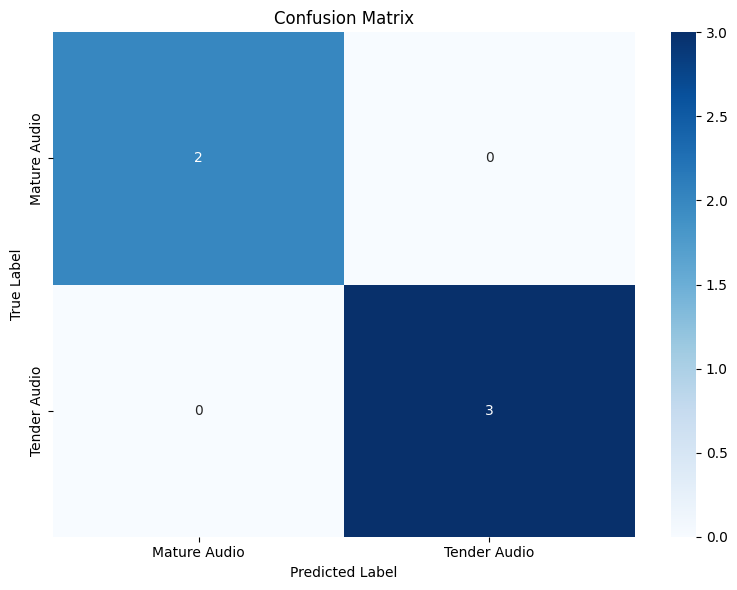

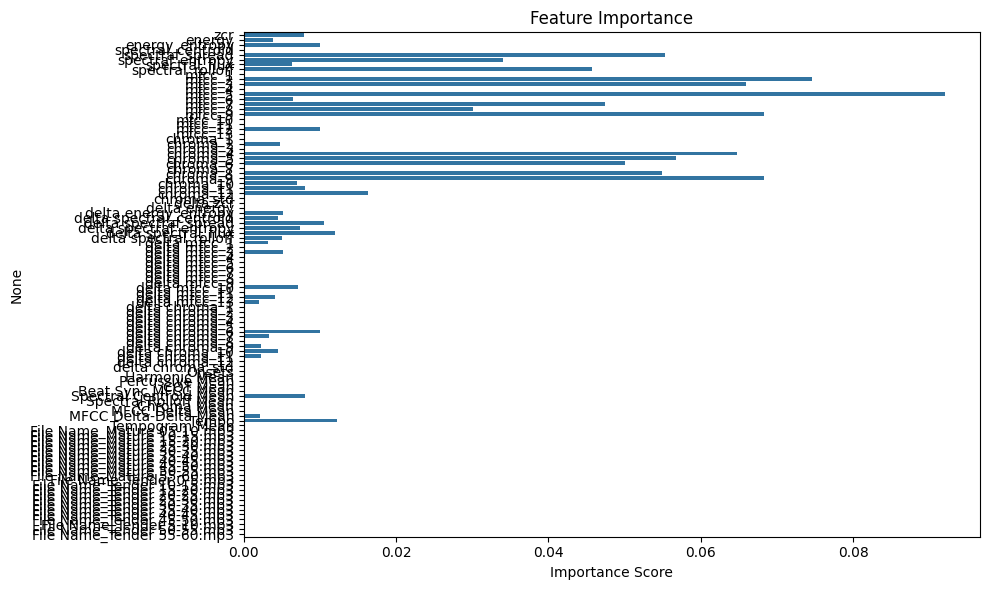

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    """
    Load the audio dataset from Excel file
    
    Parameters:
    file_path (str): Path to the Excel file
    
    Returns:
    pandas.DataFrame: Loaded dataset
    """
    try:
        df = pd.read_excel(file_path)
        print("Dataset loaded successfully.")
        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

def preprocess_data(df):
    """
    Preprocess the dataset for machine learning
    
    Parameters:
    df (pandas.DataFrame): Input dataframe
    
    Returns:
    tuple: Processed features (X), labels (y), and the label encoder
    """
    try:
        # Drop unnecessary columns
        columns_to_drop = ['Rhythm Complexity']  # Add or replace with other non-feature columns
        df = df.drop(columns=columns_to_drop, errors='ignore')

        # Separate features and target
        X = df.drop(columns=['Genre'], errors='ignore')  # Replace 'Genre' with your target column name
        y = df['Genre']

        # Ensure all features are numeric
        X = pd.get_dummies(X, drop_first=True)

        # Encode the target variable
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)

        print("Preprocessing completed successfully.")
        return X, y_encoded, le
    except Exception as e:
        print(f"Error in preprocessing: {e}")
        return None, None, None

def train_random_forest(X_train, y_train, n_estimators=100, random_state=42):
    """
    Train a Random Forest Classifier
    
    Parameters:
    X_train (array-like): Training features
    y_train (array-like): Training labels
    n_estimators (int): Number of trees in the forest
    random_state (int): Seed for reproducibility
    
    Returns:
    RandomForestClassifier: Trained model
    """
    try:
        rf_classifier = RandomForestClassifier(
            n_estimators=n_estimators, 
            random_state=random_state, 
            verbose=1
        )
        rf_classifier.fit(X_train, y_train)
        print("Model training completed successfully.")
        return rf_classifier
    except Exception as e:
        print(f"Error training model: {e}")
        return None

def evaluate_model(model, X_test, y_test, le):
    """
    Evaluate the Random Forest model
    
    Parameters:
    model (RandomForestClassifier): Trained model
    X_test (array-like): Test features
    y_test (array-like): Test labels
    le (LabelEncoder): Label encoder for decoding
    """
    try:
        # Predictions
        y_pred = model.predict(X_test)
        
        # Classification Report
        print("Classification Report:")
        print(classification_report(y_test, y_pred, target_names=le.classes_))
        
        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=le.classes_, 
                    yticklabels=le.classes_)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()
        
        # Feature Importance
        feature_importance = model.feature_importances_
        feature_names = X_test.columns
        
        plt.figure(figsize=(10, 6))
        sns.barplot(x=feature_importance, y=feature_names)
        plt.title('Feature Importance')
        plt.xlabel('Importance Score')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error in evaluation: {e}")

def main(file_path):
    """
    Main function to execute the pipeline
    
    Parameters:
    file_path (str): Path to the dataset
    """
    # Load the dataset
    df = load_data(file_path)
    if df is None:
        return
    
    # Preprocess the data
    X, y, le = preprocess_data(df)
    if X is None or y is None:
        return
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Train the model
    rf_model = train_random_forest(X_train, y_train)
    if rf_model is None:
        return
    
    # Evaluate the model
    evaluate_model(rf_model, X_test, y_test, le)

if __name__ == "__main__":
    # Replace with your actual Excel file path
    main('/home/ashwathama/Documents/GitHub/agritech/audioTest.xlsx')


Dataset loaded successfully.
Preprocessing completed successfully.
Training the model...


[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.1s
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


Model training completed successfully.
Model saved to /home/ashwathama/Documents/GitHub/agritech/rf_model.pkl.
Classification Report:
              precision    recall  f1-score   support

Mature Audio       1.00      1.00      1.00         2
Tender Audio       1.00      1.00      1.00         3

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5



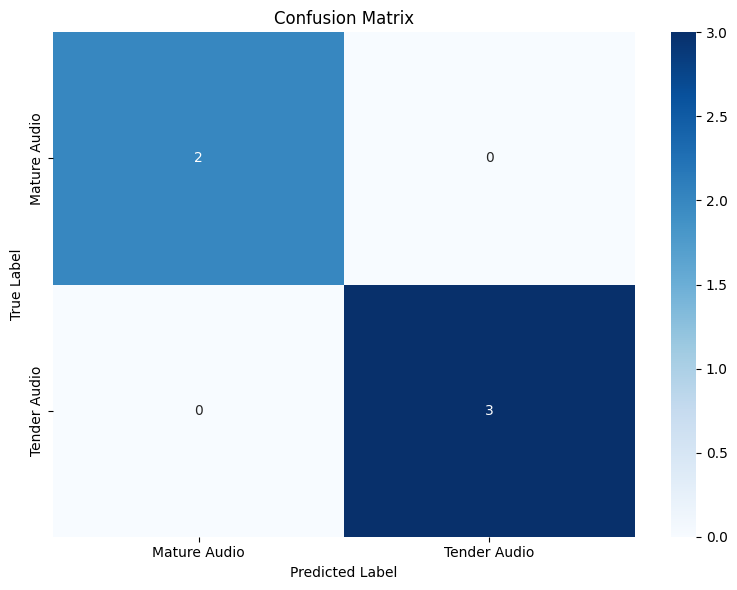

In [13]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(file_path):
    try:
        df = pd.read_excel(file_path)
        print("Dataset loaded successfully.")
        return df
    except Exception as e:
        print(f"Error loading dataset: {e}")
        return None

def preprocess_data(df):
    try:
        # Drop unnecessary columns
        columns_to_drop = ['Rhythm Complexity']  # Add or replace with other non-feature columns
        df = df.drop(columns=columns_to_drop, errors='ignore')

        # Separate features and target
        X = df.drop(columns=['Genre'], errors='ignore')
        y = df['Genre']

        # Ensure all features are numeric
        X = pd.get_dummies(X, drop_first=True)

        # Encode the target variable
        le = LabelEncoder()
        y_encoded = le.fit_transform(y)

        print("Preprocessing completed successfully.")
        return X, y_encoded, le
    except Exception as e:
        print(f"Error in preprocessing: {e}")
        return None, None, None

def train_random_forest(X_train, y_train, n_estimators=100, random_state=42):
    try:
        rf_classifier = RandomForestClassifier(
            n_estimators=n_estimators, 
            random_state=random_state, 
            verbose=1
        )
        rf_classifier.fit(X_train, y_train)
        print("Model training completed successfully.")
        return rf_classifier
    except Exception as e:
        print(f"Error training model: {e}")
        return None

def save_model(model, file_name):
    """
    Save the trained model to a pickle file
    
    Parameters:
    model (RandomForestClassifier): Trained model
    file_name (str): Path to save the model
    """
    try:
        with open(file_name, 'wb') as file:
            pickle.dump(model, file)
        print(f"Model saved to {file_name}.")
    except Exception as e:
        print(f"Error saving model: {e}")

def load_model(file_name):
    """
    Load a trained model from a pickle file
    
    Parameters:
    file_name (str): Path to the saved model
    
    Returns:
    RandomForestClassifier: Loaded model
    """
    try:
        with open(file_name, 'rb') as file:
            model = pickle.load(file)
        print(f"Model loaded from {file_name}.")
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

def evaluate_model(model, X_test, y_test, le):
    try:
        y_pred = model.predict(X_test)
        print("Classification Report:")
        print(classification_report(y_test, y_pred, target_names=le.classes_))
        
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                    xticklabels=le.classes_, 
                    yticklabels=le.classes_)
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Error in evaluation: {e}")

def main(file_path, model_file):
    df = load_data(file_path)
    if df is None:
        return
    
    X, y, le = preprocess_data(df)
    if X is None or y is None:
        return
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Train or Load the model
    try:
        print("Training the model...")
        rf_model = train_random_forest(X_train, y_train)
        save_model(rf_model, model_file)
    except:
        print("Loading the model from file...")
        rf_model = load_model(model_file)
    
    if rf_model is not None:
        evaluate_model(rf_model, X_test, y_test, le)

if __name__ == "__main__":
    dataset_path = '/home/ashwathama/Documents/GitHub/agritech/audioTest.xlsx'
    pickle_path = '/home/ashwathama/Documents/GitHub/agritech/rf_model.pkl'
    main(dataset_path, pickle_path)
